In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
import scipy.stats as stats

In [2]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["axes.unicode_minus"] = False

In [3]:
df = pd.read_excel("빚추가마지막.xlsx")
df.head()

,Unnamed: 0,gen,age,religion,edu,sm_year,sm_state,sm_day,dr_mean_year,dr_6cup,...,preg_experience,health_state,disabled,work_state,work_code,region,income,y_total,debt,y_train
0,0,female,78,yes,중졸,NaN,no,NaN,전혀마시지않음,NaN,...,없다,2,abled,nowork,NaN,city,405.0,20,10350.0,0
1,1,male,75,no,초졸이하,NaN,no,NaN,전혀마시지않음,NaN,...,남성,1,abled,work,942.0,city,2788.0,29,0.0,1
2,2,male,81,yes,대졸이상,NaN,no,NaN,전혀마시지않음,NaN,...,남성,4,abled,work,762.0,city,2304.0,18,21220.0,0
3,3,male,61,yes,대졸이상,NaN,no,NaN,전혀마시지않음,NaN,...,남성,4,abled,work,855.0,city,5231.0,20,0.0,0
4,4,female,60,yes,고졸,NaN,no,NaN,전혀마시지않음,NaN,...,없다,4,abled,work,399.0,city,5231.0,21,0.0,0


In [4]:
df.loc[(df['income']>0)&(df['debt']>0),:].info()

<class 'pandas.core.frame.DataFrame'>
Index: 5414 entries, 0 to 13473
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       5414 non-null   int64  
 1   gen              5414 non-null   object 
 2   age              5414 non-null   int64  
 3   religion         5414 non-null   object 
 4   edu              5414 non-null   object 
 5   sm_year          383 non-null    float64
 6   sm_state         5414 non-null   object 
 7   sm_day           1048 non-null   float64
 8   dr_mean_year     5414 non-null   object 
 9   dr_6cup          2955 non-null   object 
 10  dr_hurt          2955 non-null   object 
 11  dr_worry         2955 non-null   object 
 12  preg_experience  5414 non-null   object 
 13  health_state     5414 non-null   int64  
 14  disabled         5414 non-null   object 
 15  work_state       5414 non-null   object 
 16  work_code        3801 non-null   float64
 17  region           5

In [5]:
df= df.loc[(df['income']>0)&(df['debt']>0),:]

<Axes: xlabel='debt', ylabel='income'>

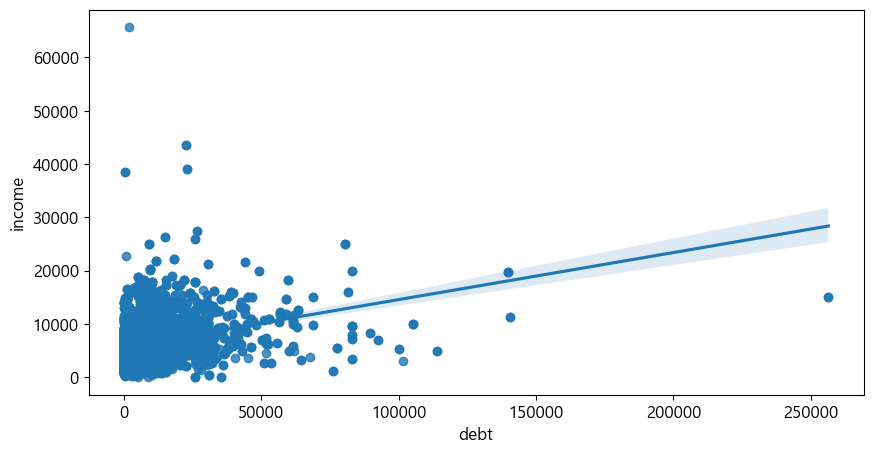

In [6]:
sns.regplot(data=df,x='debt',y='income')

<Axes: xlabel='debt', ylabel='y_total'>

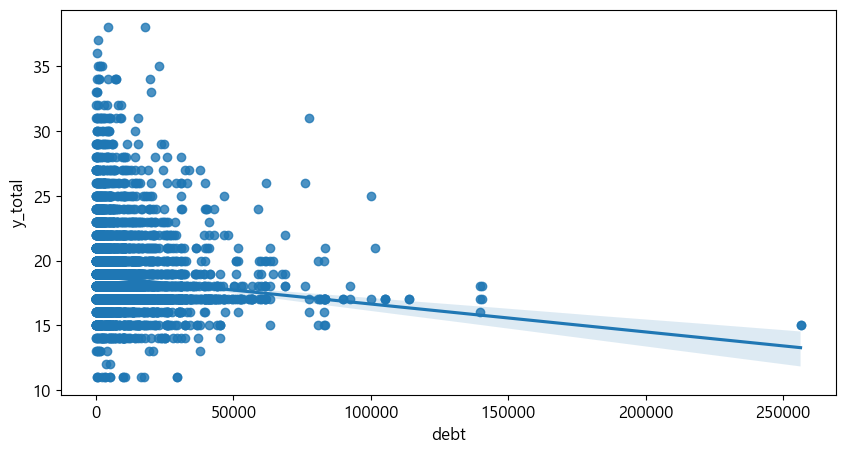

In [7]:
sns.regplot(data=df,x='debt',y='y_total')

In [8]:
corr  = df[['debt','income']].corr()
corr

,debt,income
debt,1.000000,0.300693
income,0.300693,1.000000


In [9]:
bins = [20,29,39,49,59,99]
labels = ['19~29세','30~39세','40~49세','50~59세','60세 이상']

cuts = pd.cut(df['age'],bins,labels=labels)
df['age_range'] = cuts
df.head()

,Unnamed: 0,gen,age,religion,edu,sm_year,sm_state,sm_day,dr_mean_year,dr_6cup,...,health_state,disabled,work_state,work_code,region,income,y_total,debt,y_train,age_range
0,0,female,78,yes,중졸,NaN,no,NaN,전혀마시지않음,NaN,...,2,abled,nowork,NaN,city,405.0,20,10350.0,0,60세 이상
2,2,male,81,yes,대졸이상,NaN,no,NaN,전혀마시지않음,NaN,...,4,abled,work,762.0,city,2304.0,18,21220.0,0,60세 이상
8,8,female,53,yes,고졸,NaN,no,NaN,전혀마시지않음,NaN,...,2,abled,work,151.0,city,2290.8,21,1020.0,0,50~59세
9,9,female,31,no,중졸,NaN,no,NaN,전혀마시지않음,NaN,...,2,abled,nowork,NaN,city,2290.8,17,1020.0,0,30~39세
13,13,male,45,no,대졸이상,NaN,yes,14.0,월2~3회,연1회,...,4,abled,work,399.0,city,5958.0,20,12921.0,0,40~49세


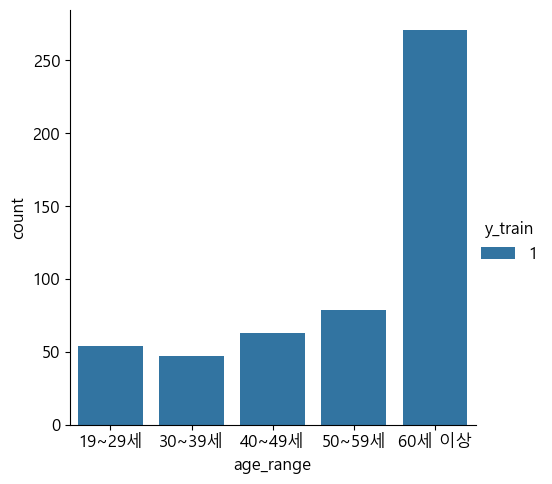

In [10]:
sns.catplot(data=df.loc[df['y_train']==1],x='age_range',kind='count',hue='y_train')

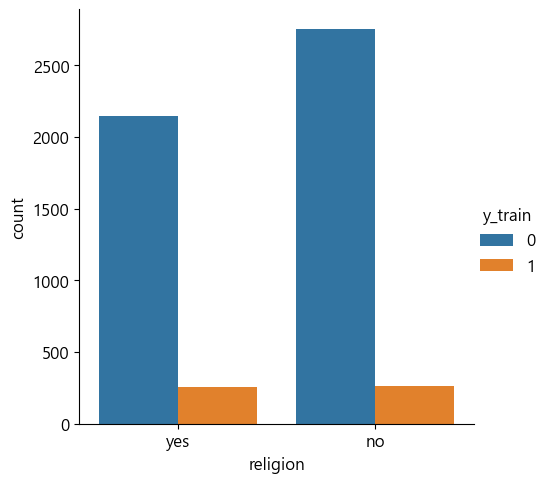

In [11]:
sns.catplot(data=df,x='religion',kind='count',hue='y_train')

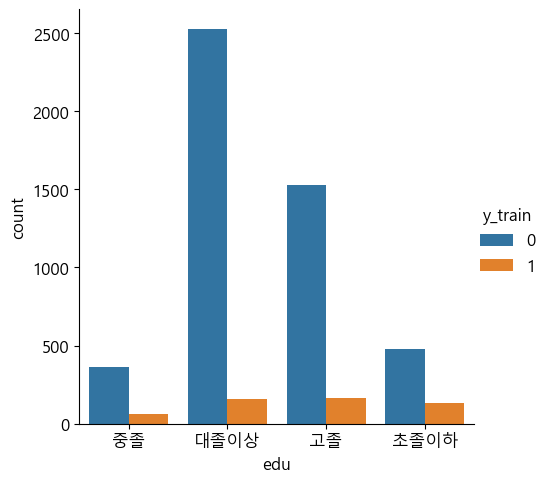

In [12]:
sns.catplot(data=df,x='edu',kind='count',hue='y_train')
plt.show()
plt.close()

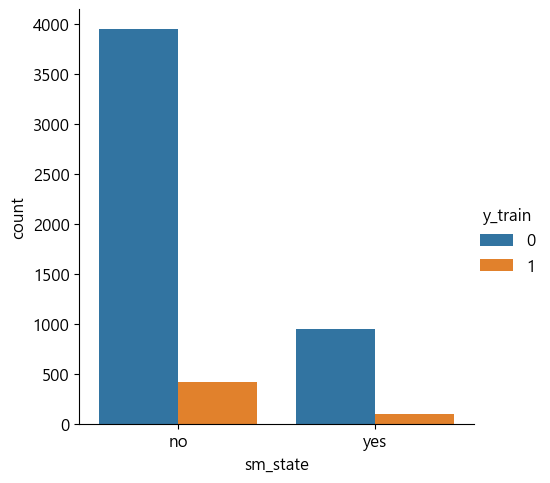

In [13]:
sns.catplot(data=df,x='sm_state',kind='count',hue='y_train')

In [14]:
from sklearn.utils import resample

subset_city_downsampled = resample(df[df['sm_state']=='no'],
                            replace=False,
                            n_samples =1048 ,
                            random_state = 2020)
                            


In [15]:
sm_data = pd.concat([df[df['sm_state']=='yes'],subset_city_downsampled])
sm_data['sm_state'].value_counts()

sm_state
yes    1048
no     1048
Name: count, dtype: int64

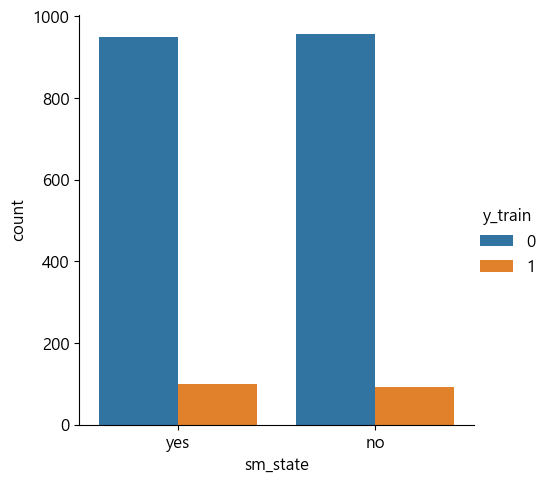

In [16]:
sns.catplot(data=sm_data,x='sm_state',kind='count',hue='y_train')

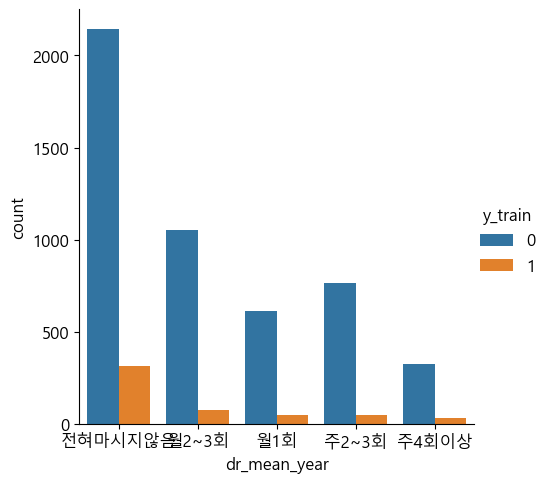

In [17]:
sns.catplot(data=df,x='dr_mean_year',kind='count',hue='y_train')

In [18]:
over_dr = df.loc[df['dr_6cup'].notnull(),:]

over_dr['dr_6cup'].isnull().sum()

0

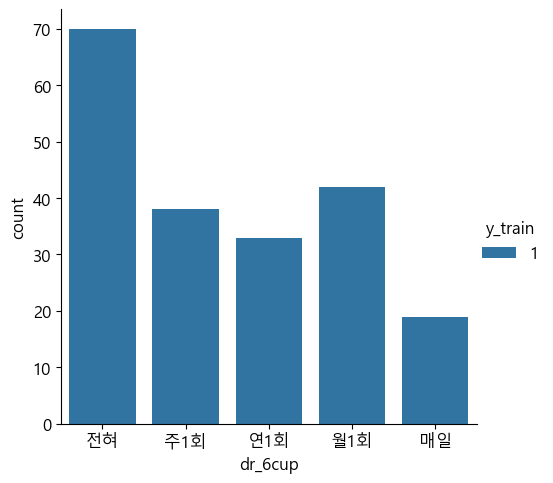

In [19]:
sns.catplot(data=over_dr.loc[over_dr['y_train']==1],x='dr_6cup',kind='count',hue='y_train')

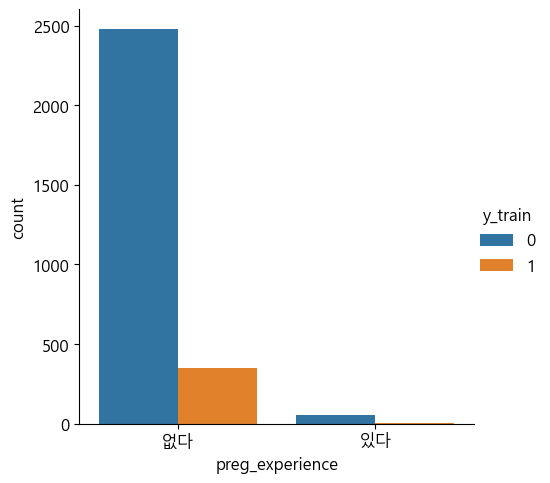

In [20]:
woman = df.loc[df['preg_experience']!='남성']
sns.catplot(data=woman,x='preg_experience',kind='count',hue='y_train')

In [21]:

subset_city_downsampled = resample(woman[woman['preg_experience']=='없다'],
                            replace=False,
                            n_samples =57 ,
                            random_state = 2020)

In [22]:
sm_data = pd.concat([woman[woman['preg_experience']=='있다'],subset_city_downsampled])
sm_data['preg_experience'].value_counts()

preg_experience
있다    57
없다    57
Name: count, dtype: int64

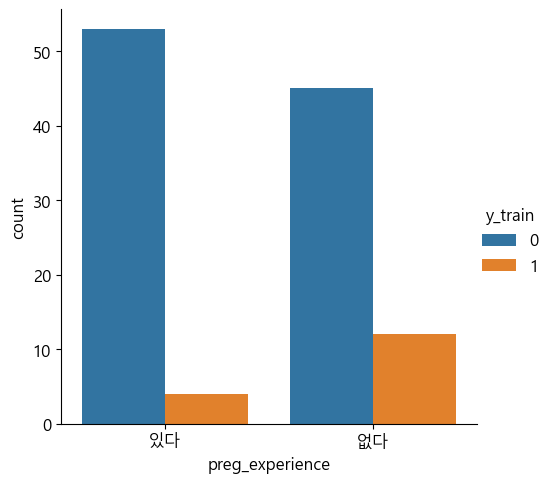

In [23]:
sns.catplot(data=sm_data,x='preg_experience',kind='count',hue='y_train')

,health_state,y_total
health_state,1.000000,-0.342151
y_total,-0.342151,1.000000


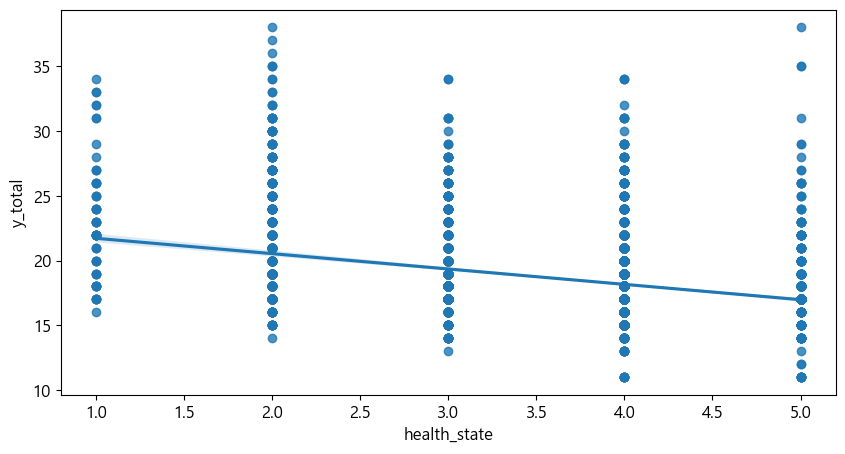

In [24]:
sns.regplot(data=df,x='health_state',y='y_total')
corr = df[['health_state','y_total']].corr(method='pearson')
corr

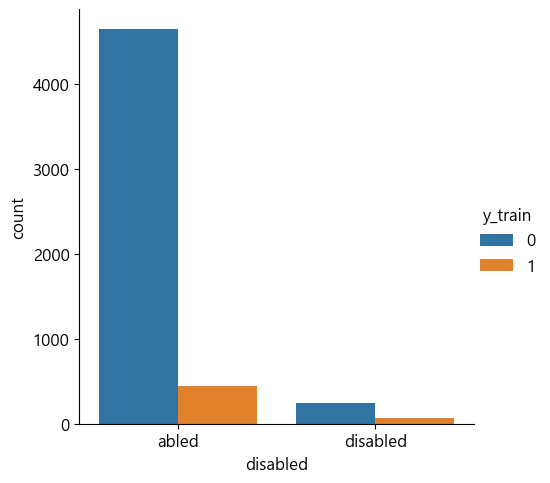

In [25]:
sns.catplot(data=df,x='disabled',kind='count',hue='y_train')

In [26]:
subset_city_downsampled = resample(df[df['disabled']=='abled'],
                            replace=False,
                            n_samples =319 ,
                            random_state = 2020)
able = pd.concat([df[df['disabled']=='disabled'],subset_city_downsampled])
able['disabled'].value_counts()

disabled
abled       319
disabled    318
Name: count, dtype: int64

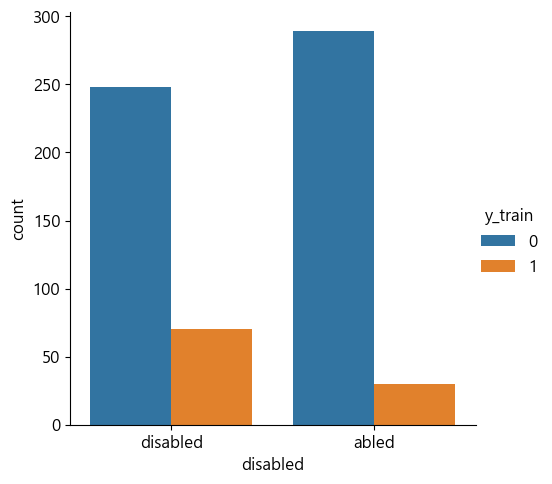

In [27]:
sns.catplot(data=able,x='disabled',kind='count',hue='y_train')

In [28]:
df['work_state'].unique()

array(['nowork', 'work'], dtype=object)

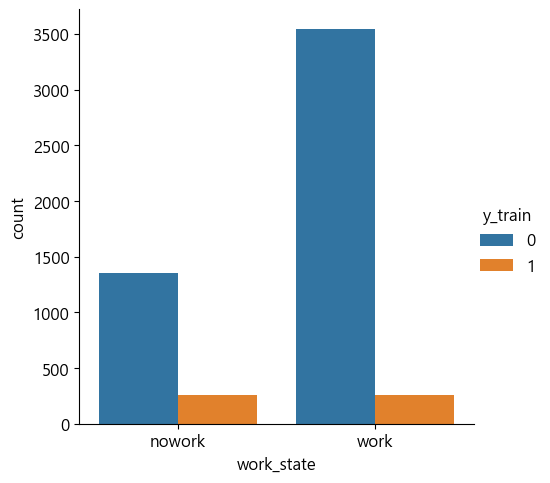

In [29]:
sns.catplot(data=df,x='work_state',kind='count',hue='y_train')

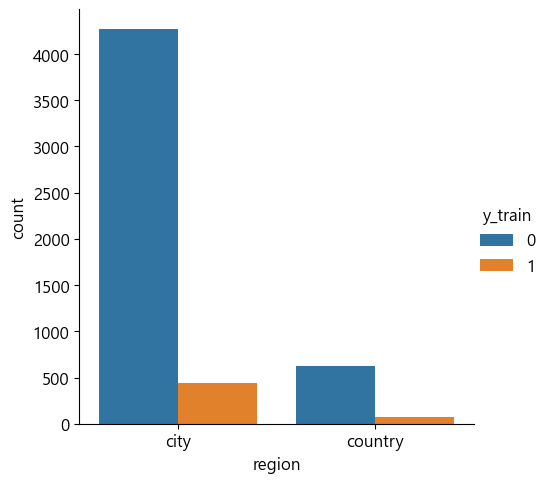

In [30]:
sns.catplot(data=df,x='region',kind='count',hue='y_train')

In [31]:

subset_city_downsampled = resample(df[df['region']=='city'],
                            replace=False,
                            n_samples =696 ,
                            random_state = 2020)
city = pd.concat([df[df['region']=='country'],subset_city_downsampled])
city['region'].value_counts()

region
country    696
city       696
Name: count, dtype: int64

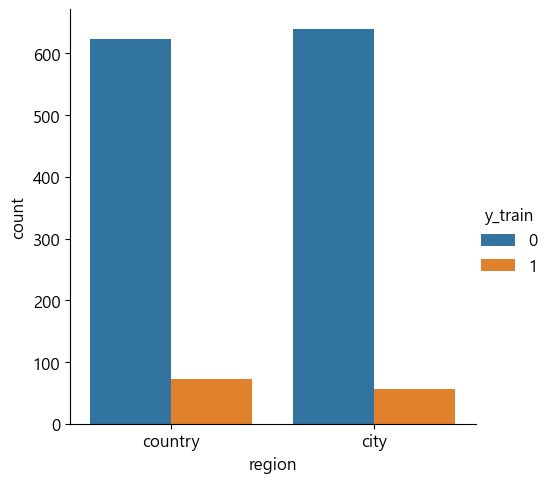

In [32]:
sns.catplot(data=city,x='region',kind='count',hue='y_train')

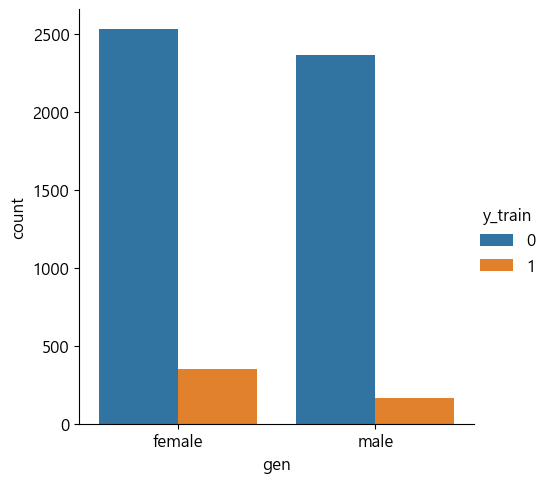

In [33]:
sns.catplot(data=df,x='gen',kind='count',hue='y_train')

In [34]:
df.head()

,Unnamed: 0,gen,age,religion,edu,sm_year,sm_state,sm_day,dr_mean_year,dr_6cup,...,health_state,disabled,work_state,work_code,region,income,y_total,debt,y_train,age_range
0,0,female,78,yes,중졸,NaN,no,NaN,전혀마시지않음,NaN,...,2,abled,nowork,NaN,city,405.0,20,10350.0,0,60세 이상
2,2,male,81,yes,대졸이상,NaN,no,NaN,전혀마시지않음,NaN,...,4,abled,work,762.0,city,2304.0,18,21220.0,0,60세 이상
8,8,female,53,yes,고졸,NaN,no,NaN,전혀마시지않음,NaN,...,2,abled,work,151.0,city,2290.8,21,1020.0,0,50~59세
9,9,female,31,no,중졸,NaN,no,NaN,전혀마시지않음,NaN,...,2,abled,nowork,NaN,city,2290.8,17,1020.0,0,30~39세
13,13,male,45,no,대졸이상,NaN,yes,14.0,월2~3회,연1회,...,4,abled,work,399.0,city,5958.0,20,12921.0,0,40~49세


In [35]:
df.columns

Index(['Unnamed: 0', 'gen', 'age', 'religion', 'edu', 'sm_year', 'sm_state',
       'sm_day', 'dr_mean_year', 'dr_6cup', 'dr_hurt', 'dr_worry',
       'preg_experience', 'health_state', 'disabled', 'work_state',
       'work_code', 'region', 'income', 'y_total', 'debt', 'y_train',
       'age_range'],
      dtype='object')

In [36]:
df['age_range']= df['age_range'].astype('str')
df['age_range'].unique()

array(['60세 이상', '50~59세', '30~39세', '40~49세', '19~29세', 'nan'],
      dtype=object)

In [37]:
df['age_range'] = df['age_range'].fillna(0)
df = df.loc[df['age_range']!=0,:]


In [38]:
df.isnull().sum()

Unnamed: 0            0
gen                   0
age                   0
religion              0
edu                   0
sm_year            5031
sm_state              0
sm_day             4366
dr_mean_year          0
dr_6cup            2459
dr_hurt            2459
dr_worry           2459
preg_experience       0
health_state          0
disabled              0
work_state            0
work_code          1613
region                0
income                0
y_total               0
debt                  0
y_train               0
age_range             0
dtype: int64

In [39]:
from statsmodels.formula.api import logit

In [40]:
pd.set_option("display.max_rows", None)

In [41]:
df['log_income'] = np.log1p(df['income'])
df['log_debt'] = np.log1p(df['debt'])


In [42]:
df.columns

Index(['Unnamed: 0', 'gen', 'age', 'religion', 'edu', 'sm_year', 'sm_state',
       'sm_day', 'dr_mean_year', 'dr_6cup', 'dr_hurt', 'dr_worry',
       'preg_experience', 'health_state', 'disabled', 'work_state',
       'work_code', 'region', 'income', 'y_total', 'debt', 'y_train',
       'age_range', 'log_income', 'log_debt'],
      dtype='object')

In [43]:
df=df.loc[:,['gen','edu','health_state','disabled','work_state','y_train','age_range','log_income','log_debt']]
df.head()

,gen,edu,health_state,disabled,work_state,y_train,age_range,log_income,log_debt
0,female,중졸,2,abled,nowork,0,60세 이상,6.006353,9.244838
2,male,대졸이상,4,abled,work,0,60세 이상,7.742836,9.962747
8,female,고졸,2,abled,work,0,50~59세,7.737093,6.928538
9,female,중졸,2,abled,nowork,0,30~39세,7.737093,6.928538
13,male,대졸이상,4,abled,work,0,40~49세,8.692658,9.466687


In [44]:
df['edu'].value_counts()

edu
대졸이상    2686
고졸      1690
초졸이하     607
중졸       431
Name: count, dtype: int64

In [45]:
df.loc[df['gen']=='male','gen']=1
df.loc[df['gen']=='female','gen']=2
df['gen'] = df['gen'].astype('category')

df.loc[df['edu']=='초졸이하','edu']=1
df.loc[df['edu']=='중졸','edu']=2
df.loc[df['edu']=='고졸','edu']=3
df.loc[df['edu']=='대졸이상','edu']=4
df['edu'] = df['edu'].astype('category')

df['health_state'] = df['health_state'].astype('category')

df.loc[df['disabled']=='disabled','disabled']=1
df.loc[df['disabled']=='abled','disabled']=2
df['work_state']= df['disabled'].astype('category')

df.loc[df['work_state']=='work','work_state']=1
df.loc[df['work_state']=='nowork','work_state']=2
df['work_state'] = df['work_state'].astype('category')







In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5414 entries, 0 to 13473
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   gen           5414 non-null   category
 1   edu           5414 non-null   category
 2   health_state  5414 non-null   category
 3   disabled      5414 non-null   object  
 4   work_state    5414 non-null   category
 5   y_train       5414 non-null   int64   
 6   age_range     5414 non-null   object  
 7   log_income    5414 non-null   float64 
 8   log_debt      5414 non-null   float64 
dtypes: category(4), float64(2), int64(1), object(2)
memory usage: 275.6+ KB


In [47]:
df['age_range'] = df['age_range'].astype('str')
df.loc[df['age_range']=='19~29세','age_range']=1
df.loc[df['age_range']=='30~39세','age_range']=2
df.loc[df['age_range']=='40~49세','age_range']=3
df.loc[df['age_range']=='50~59세','age_range']=4
df.loc[df['age_range']=='60세 이상','age_range']=5
df['age_range'] = df['age_range'].astype('category')

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5414 entries, 0 to 13473
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   gen           5414 non-null   category
 1   edu           5414 non-null   category
 2   health_state  5414 non-null   category
 3   disabled      5414 non-null   object  
 4   work_state    5414 non-null   category
 5   y_train       5414 non-null   int64   
 6   age_range     5414 non-null   category
 7   log_income    5414 non-null   float64 
 8   log_debt      5414 non-null   float64 
dtypes: category(5), float64(2), int64(1), object(1)
memory usage: 238.8+ KB


In [49]:
df['age_range'].unique()

[5, 4, 2, 3, 1, 'nan']
Categories (6, object): [1, 2, 3, 4, 5, 'nan']

In [50]:
df['age_range']=df['age_range'].astype(str)
df= df.loc[df['age_range']!='nan',:]
df['age_range']=df['age_range'].astype("category")

In [51]:
df['age_range'].unique()

['5', '4', '2', '3', '1']
Categories (5, object): ['1', '2', '3', '4', '5']

In [52]:
df.columns

Index(['gen', 'edu', 'health_state', 'disabled', 'work_state', 'y_train',
       'age_range', 'log_income', 'log_debt'],
      dtype='object')

In [53]:
from sklearn.preprocessing import OneHotEncoder

In [55]:
df = pd.get_dummies(df,drop_first=True,dtype='int')
df.head()
a = list(df.columns)
print(a)

['y_train', 'log_income', 'log_debt', 'gen_2', 'edu_2', 'edu_3', 'edu_4', 'health_state_2', 'health_state_3', 'health_state_4', 'health_state_5', 'disabled_2', 'work_state_2', 'age_range_2', 'age_range_3', 'age_range_4', 'age_range_5']


In [56]:
import statsmodels.api as sm
model = sm.OLS(df['y_train'], df[['log_income','log_debt', 'gen_2','edu_2','edu_3','edu_4','health_state_2','health_state_3','health_state_4','health_state_5','disabled_2','work_state_2','age_range_2','age_range_3','age_range_4','age_range_5']])
result = model.fit()
tbl = result.summary()
tbl

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                y_train   R-squared (uncentered):                   0.159
Model:                            OLS   Adj. R-squared (uncentered):              0.157
Method:                 Least Squares   F-statistic:                              68.10
Date:                Mon, 14 Aug 2023   Prob (F-statistic):                   5.42e-190
Time:                        11:07:43   Log-Likelihood:                         -841.77
No. Observations:                5405   AIC:                                      1714.
Df Residuals:                    5390   BIC:                                      1812.
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
log_income         0.0146      0.005      3.162      0.002       0.006       0.024
log_debt           0.0027      0.003      0.996      0.319      -0.003       0.008
gen_2              0.0551      0.008      7.023      0.000       0.040       0.071
edu_2              0.0107      0.018      0.591      0.554      -0.025       0.046
edu_3              0.0048      0.016      0.308      0.758      -0.026       0.036
edu_4             -0.0096      0.017     -0.568      0.570      -0.043       0.024
health_state_2     0.0854      0.033      2.565      0.010       0.020       0.151
health_state_3    -0.0664      0.034     -1.970      0.049      -0.133      -0.000
health_state_4    -0.1249      0.034     -3.687      0.000      -0.191      -0.058
health_state_5    -0.1143      0.036     -3.210      0.001      -0.184      -0.044
disabled_2        -0.0042      0.009     -0.497      0.619      -0.021       0.012
work_state_2      -0.0042      0.009     -0.497      0.619      -0.021       0.012
age_range_2        0.0085      0.015      0.568      0.570      -0.021       0.038
age_range_3       -0.0073      0.014     -0.532      0.595      -0.034       0.020
age_range_4       -0.0007      0.014     -0.046      0.964      -0.029       0.028
age_range_5        0.0348      0.015      2.310      0.021       0.005       0.064
==============================================================================
Omnibus:                     2613.469   Durbin-Watson:                   1.806
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11250.711
Skew:                           2.464   Prob(JB):                         0.00
Kurtosis:                       8.066   Cond. No.                     2.73e+17
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 1.09e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [55]:
# df = df.drop(['age_range_nan'],axis=1)
# df.columns

In [56]:
df.head()

,y_train,log_income,log_debt,gen_2,edu_2,edu_3,edu_4,health_state_2,health_state_3,health_state_4,health_state_5,disabled_2,work_state_2,age_range_2,age_range_3,age_range_4,age_range_5
0,0,6.006353,9.244838,1,1,0,0,1,0,0,0,1,1,0,0,0,1
2,0,7.742836,9.962747,0,0,0,1,0,0,1,0,1,1,0,0,0,1
8,0,7.737093,6.928538,1,0,1,0,1,0,0,0,1,1,0,0,1,0
9,0,7.737093,6.928538,1,1,0,0,1,0,0,0,1,1,1,0,0,0
13,0,8.692658,9.466687,0,0,0,1,0,0,1,0,1,1,0,1,0,0


In [57]:
cnames = list(df.columns)
cnames = cnames[1:]
cnames

['log_income',
 'log_debt',
 'gen_2',
 'edu_2',
 'edu_3',
 'edu_4',
 'health_state_2',
 'health_state_3',
 'health_state_4',
 'health_state_5',
 'disabled_2',
 'work_state_2',
 'age_range_2',
 'age_range_3',
 'age_range_4',
 'age_range_5']

In [58]:
model = logit('y_train ~df[cnames]',data = df)
fit = model.fit()
print(fit.summary())

Optimization terminated successfully.
         Current function value: 0.271255
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                y_train   No. Observations:                 5405
Model:                          Logit   Df Residuals:                     5389
Method:                           MLE   Df Model:                           15
Date:                Mon, 14 Aug 2023   Pseudo R-squ.:                  0.1366
Time:                        10:47:42   Log-Likelihood:                -1466.1
converged:                       True   LL-Null:                       -1698.1
Covariance Type:            nonrobust   LLR p-value:                 2.330e-89
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          4.4321      0.660      6.712      0.000       3.138       5.726
df[cnames][0]    

In [59]:
cnames

['log_income',
 'log_debt',
 'gen_2',
 'edu_2',
 'edu_3',
 'edu_4',
 'health_state_2',
 'health_state_3',
 'health_state_4',
 'health_state_5',
 'disabled_2',
 'work_state_2',
 'age_range_2',
 'age_range_3',
 'age_range_4',
 'age_range_5']

In [61]:
# df[cnames][1] -> log_debt
# df[cnames][3]  -> edu_2
# df[cnames][4]  -> edu_3
# df[cnames][5] -> edu_4
# df[cnames][10]  -> disabled_2
# df[cnames][11]  -> work_state_2
# df[cnames][12]  -> age_range_2


In [62]:
df.drop(['log_debt','edu_2','edu_3','edu_4','disabled_2','work_state_2','age_range_2'],axis=1,inplace=True)
df.head()


,y_train,log_income,gen_2,health_state_2,health_state_3,health_state_4,health_state_5,age_range_3,age_range_4,age_range_5
0,0,6.006353,1,1,0,0,0,0,0,1
2,0,7.742836,0,0,0,1,0,0,0,1
8,0,7.737093,1,1,0,0,0,0,1,0
9,0,7.737093,1,1,0,0,0,0,0,0
13,0,8.692658,0,0,0,1,0,1,0,0


In [63]:
cnames2= list(df.columns)
cnames2

['y_train',
 'log_income',
 'gen_2',
 'health_state_2',
 'health_state_3',
 'health_state_4',
 'health_state_5',
 'age_range_3',
 'age_range_4',
 'age_range_5']

In [64]:
df.head()

,y_train,log_income,gen_2,health_state_2,health_state_3,health_state_4,health_state_5,age_range_3,age_range_4,age_range_5
0,0,6.006353,1,1,0,0,0,0,0,1
2,0,7.742836,0,0,0,1,0,0,0,1
8,0,7.737093,1,1,0,0,0,0,1,0
9,0,7.737093,1,1,0,0,0,0,0,0
13,0,8.692658,0,0,0,1,0,1,0,0


In [65]:
model2 = logit('y_train ~ log_income+gen_2+health_state_2+health_state_3+health_state_4+health_state_5+age_range_3+age_range_4+age_range_5',data = df)
fit2 = model2.fit()
print(fit2.summary())

Optimization terminated successfully.
         Current function value: 0.272503
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                y_train   No. Observations:                 5405
Model:                          Logit   Df Residuals:                     5395
Method:                           MLE   Df Model:                            9
Date:                Mon, 14 Aug 2023   Pseudo R-squ.:                  0.1326
Time:                        10:49:32   Log-Likelihood:                -1472.9
converged:                       True   LL-Null:                       -1698.1
Covariance Type:            nonrobust   LLR p-value:                 2.275e-91
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.7707      0.624      6.039      0.000       2.547       4.995
log_income       

In [66]:
model2 = logit('y_train ~ log_income+gen_2+health_state_2+health_state_3+health_state_4+health_state_5+age_range_3',data = df)
fit2 = model2.fit()
print(fit2.summary())

Optimization terminated successfully.
         Current function value: 0.272791
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                y_train   No. Observations:                 5405
Model:                          Logit   Df Residuals:                     5397
Method:                           MLE   Df Model:                            7
Date:                Mon, 14 Aug 2023   Pseudo R-squ.:                  0.1317
Time:                        10:49:33   Log-Likelihood:                -1474.4
converged:                       True   LL-Null:                       -1698.1
Covariance Type:            nonrobust   LLR p-value:                 1.636e-92
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.4797      0.575      6.054      0.000       2.353       4.606
log_income       

In [67]:
model2 = logit('y_train ~ log_income+gen_2+health_state_2+health_state_3+health_state_4+health_state_5',data = df)
fit2 = model2.fit()
print(fit2.summary())

Optimization terminated successfully.
         Current function value: 0.273012
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                y_train   No. Observations:                 5405
Model:                          Logit   Df Residuals:                     5398
Method:                           MLE   Df Model:                            6
Date:                Mon, 14 Aug 2023   Pseudo R-squ.:                  0.1310
Time:                        10:49:33   Log-Likelihood:                -1475.6
converged:                       True   LL-Null:                       -1698.1
Covariance Type:            nonrobust   LLR p-value:                 5.926e-93
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.5761      0.573      6.245      0.000       2.454       4.698
log_income       

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5405 entries, 0 to 13473
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   y_train         5405 non-null   int64  
 1   log_income      5405 non-null   float64
 2   gen_2           5405 non-null   int32  
 3   health_state_2  5405 non-null   int32  
 4   health_state_3  5405 non-null   int32  
 5   health_state_4  5405 non-null   int32  
 6   health_state_5  5405 non-null   int32  
 7   age_range_3     5405 non-null   int32  
 8   age_range_4     5405 non-null   int32  
 9   age_range_5     5405 non-null   int32  
dtypes: float64(1), int32(8), int64(1)
memory usage: 295.6 KB


In [70]:
import statsmodels.api as sm
model = sm.OLS(df['y_train'], df[['log_income','gen_2','health_state_2','health_state_3','health_state_4','health_state_5','age_range_3','age_range_4','age_range_5']])
result = model.fit()
tbl = result.summary()
tbl

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                y_train   R-squared (uncentered):                   0.159
Model:                            OLS   Adj. R-squared (uncentered):              0.157
Method:                 Least Squares   F-statistic:                              113.1
Date:                Mon, 14 Aug 2023   Prob (F-statistic):                   4.97e-195
Time:                        10:53:41   Log-Likelihood:                         -843.83
No. Observations:                5405   AIC:                                      1706.
Df Residuals:                    5396   BIC:                                      1765.
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
log_income         0.0157      0.004      4.186      0.000       0.008       0.023
gen_2              0.0551      0.008      7.146      0.000       0.040       0.070
health_state_2     0.0903      0.033      2.767      0.006       0.026       0.154
health_state_3    -0.0620      0.033     -1.894      0.058      -0.126       0.002
health_state_4    -0.1215      0.033     -3.709      0.000      -0.186      -0.057
health_state_5    -0.1117      0.035     -3.232      0.001      -0.179      -0.044
age_range_3       -0.0095      0.011     -0.853      0.393      -0.031       0.012
age_range_4        0.0007      0.012      0.063      0.950      -0.022       0.023
age_range_5        0.0386      0.011      3.510      0.000       0.017       0.060
==============================================================================
Omnibus:                     2616.050   Durbin-Watson:                   1.805
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11274.811
Skew:                           2.467   Prob(JB):                         0.00
Kurtosis:                       8.072   Cond. No.                         145.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
import statsmodels.api as sm
model = sm.OLS(df['y_train'], df[['log_income','gen_2','health_state_2','health_state_4','health_state_5','age_range_5']])
result = model.fit()
tbl = result.summary()
tbl

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                y_train   R-squared (uncentered):                   0.158
Model:                            OLS   Adj. R-squared (uncentered):              0.157
Method:                 Least Squares   F-statistic:                              168.8
Date:                Mon, 14 Aug 2023   Prob (F-statistic):                   2.55e-197
Time:                        10:54:48   Log-Likelihood:                         -846.16
No. Observations:                5405   AIC:                                      1704.
Df Residuals:                    5399   BIC:                                      1744.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
log_income         0.0088      0.001      7.012      0.000       0.006       0.011
gen_2              0.0545      0.008      7.072      0.000       0.039       0.070
health_state_2     0.1458      0.014     10.314      0.000       0.118       0.174
health_state_4    -0.0629      0.011     -5.896      0.000      -0.084      -0.042
health_state_5    -0.0536      0.015     -3.458      0.001      -0.084      -0.023
age_range_5        0.0386      0.009      4.263      0.000       0.021       0.056
==============================================================================
Omnibus:                     2623.004   Durbin-Watson:                   1.807
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11338.538
Skew:                           2.473   Prob(JB):                         0.00
Kurtosis:                       8.087   Cond. No.                         42.0
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""